Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0087 - loss: 0.6984 - val_accuracy: 0.0089 - val_loss: 0.6925
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0027 - loss: 0.6942 - val_accuracy: 1.9836e-04 - val_loss: 0.6923
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6902 - val_accuracy: 1.9836e-04 - val_loss: 0.6933
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6932 - val_accuracy: 1.9836e-04 - val_loss: 0.6921
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6786 - val_accuracy: 1.9836e-04 - val_loss: 0.6945
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6928 - val_accuracy: 1.9836e-04 - val_loss: 0.6934
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6852 - val_accuracy: 1.9836e-04 - val_loss: 0.6904
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

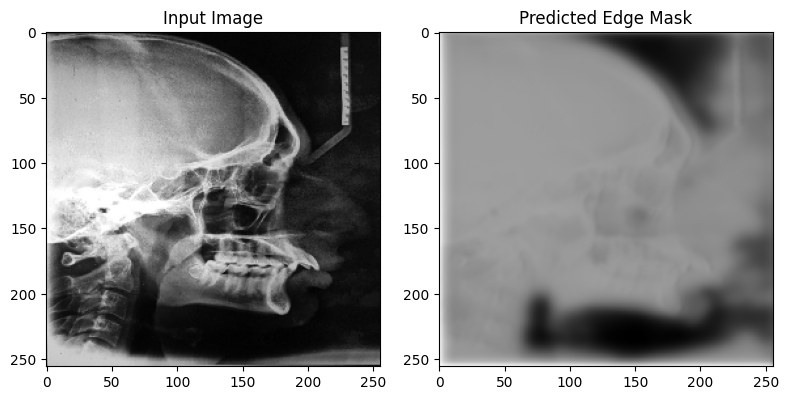

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Ensure a clean TensorFlow session
tf.keras.backend.clear_session()

# Step 2: Simplified U-Net for Edge Tracing
def edge_tracing_unet(input_size=(256, 256, 1)):
    """
    Build a U-Net model for edge tracing.

    Args:
        input_size (tuple): Input image size.

    Returns:
        Model: Compiled U-Net model.
    """
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = UpSampling2D((2, 2))(c3)
    u4 = Concatenate()([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

# Example: Use the images and masks directly without the need to load from directories
# Assuming `images` and `masks` are numpy arrays with shapes (num_samples, 256, 256, 1)

# Step 3: Data Augmentation and Model Training
train_datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotation
    width_shift_range=0.1,   # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    zoom_range=0.2,          # Random zoom
    shear_range=0.1,         # Shear transformation
    horizontal_flip=True,    # Horizontal flip
    fill_mode='nearest'      # Fill empty pixels
)

# Use data augmentation to expand the dataset
train_generator = train_datagen.flow(
    images, 
    masks, 
    batch_size=1  # Batch size of 1 since we are working with one image
)

# Build and compile the model
model = edge_tracing_unet()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Model Training
history = model.fit(
    train_generator, 
    epochs=50,  # Train for more epochs as we are using augmented data
    steps_per_epoch=100,  # Generate 100 augmented samples per epoch
    validation_data=(images, masks)  # Validate on the same images
)

# Step 4: Visualize Training Results
loss, accuracy = model.evaluate(images, masks)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")

# Visualize the predicted mask for the same input
predicted_mask = model.predict(images)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0].squeeze(), cmap='gray')
plt.title("Predicted Edge Mask")
plt.tight_layout()
plt.show()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 3.5095e-04 - loss: 0.6930 - val_accuracy: 1.9836e-04 - val_loss: 0.6881
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6820 - val_accuracy: 1.9836e-04 - val_loss: 0.6804
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6629 - val_accuracy: 1.9836e-04 - val_loss: 0.6991
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.9836e-04 - loss: 0.6225 - val_accuracy: 1.9836e-04 - val_loss: 0.8465
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.9836e-04 - loss: 0.8147 - val_accuracy: 1.9836e-04 - val_loss: 0.6980
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6921 - val_accuracy: 1.9836e-04 - val_loss: 0.6779
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.9836e-04 - loss: 0.6451 - val_accuracy: 1.9836e-04 - val_loss: 0.6787
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

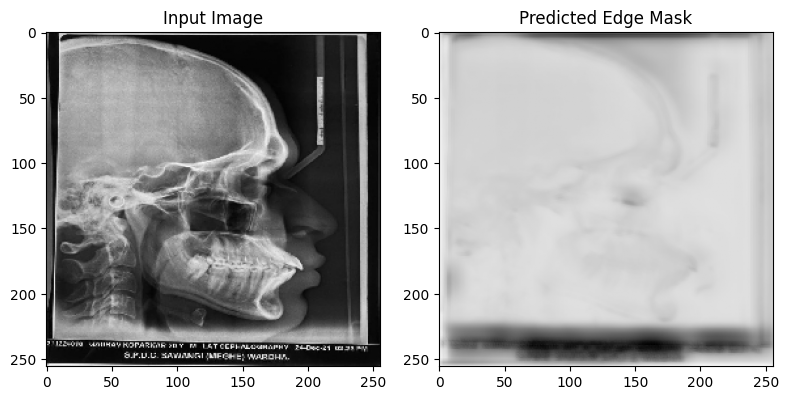

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt

# Ensure a clean TensorFlow session
tf.keras.backend.clear_session()

# Step 2: Simplified U-Net for Edge Tracing
def edge_tracing_unet(input_size=(256, 256, 1)):
    """
    Build a U-Net model for edge tracing.

    Args:
        input_size (tuple): Input image size.

    Returns:
        Model: Compiled U-Net model.
    """
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = UpSampling2D((2, 2))(c3)
    u4 = Concatenate()([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

# Load the input image and corresponding mask (training image and mask)
input_image_path = r"D:\COLLEGE\Projects\AI-Driven Cephalometric Analysis\Percision Smile\Data_sets\p2 gaurav2.jpeg"
mask_image_path = r"D:\COLLEGE\Projects\AI-Driven Cephalometric Analysis\Percision Smile\Tracesing_datasets\p44PratikPusam2.jpg"

def load_and_process_image(image_path):
    """
    Load and preprocess image by resizing to 256x256 and converting to grayscale.
    
    Args:
        image_path (str): Path to the image file.
    
    Returns:
        numpy array: Processed image.
    """
    img = load_img(image_path, target_size=(256, 256), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    return img_array

# Load the images and masks
input_image = load_and_process_image(input_image_path)
mask_image = load_and_process_image(mask_image_path)

# Convert images to 4D array (batch size, height, width, channels)
X_train = np.expand_dims(input_image, axis=0)  # Add batch dimension
y_train = np.expand_dims(mask_image, axis=0)   # Add batch dimension

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotation
    width_shift_range=0.1,   # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    zoom_range=0.2,          # Random zoom
    shear_range=0.1,         # Shear transformation
    horizontal_flip=True,    # Horizontal flip
    fill_mode='nearest'      # Fill empty pixels
)

# Use data augmentation to expand the dataset
train_generator = train_datagen.flow(
    X_train, 
    y_train, 
    batch_size=1  # Batch size of 1 since we are working with one image
)

# Build and compile the model
model = edge_tracing_unet()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Model Training
history = model.fit(
    train_generator, 
    epochs=50,  # Train for more epochs as we are using augmented data
    steps_per_epoch=100,  # Generate 100 augmented samples per epoch
    validation_data=(X_train, y_train)  # Validate on the same images
)

# Step 4: Visualize Training Results
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")

# Visualize the predicted mask for the same input
predicted_mask = model.predict(X_train)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0].squeeze(), cmap='gray')
plt.title("Predicted Edge Mask")
plt.tight_layout()
plt.show()
